# Importes

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import derivative
import circuitos as circ
import numpy as np
from matplotlib import cm
import math
import pandas as pd

# Variables globales

In [8]:

W0 = 6000*2*math.pi
Q  = 2.6466
K  = 1

W0_teoric  = W0
Q_teoric = Q
K_teoric  = K

popt_teoric = [W0_teoric, Q_teoric, K_teoric]

# Condiciones de ajuste
# w0_min <= W0 <= w0_max
# q_min  <= Q  <= q_max 
# k_min <= K <= k_max:

w0_min = W0/1000
w0_max = W0*1000
q_min = Q /10
q_max = Q *10
k_min = K /1000
k_max = K *1000
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max]) #Para la función de ajuste

# Recolección de datos

In [9]:
# Datos DSO
df_DSO = pd.read_excel('Datos_DSO.xlsx', index_col=0) 

df_DSO = df_DSO.dropna()

w_dso = df_DSO['Frecuencias Angulares'].to_numpy()

ganancia_dso = df_DSO['Ganancia'].to_numpy()

angulo_dso = df_DSO['Δ Ángulo'].to_numpy()

# Datos Analizador de Frecuencia

df_Analizador_Frec = pd.read_excel('Datos_Analizador.xlsx', index_col=0)

w_analizador_ganancia = df_Analizador_Frec['Frecuencia(Ganancia)'].dropna().to_numpy()

ganancia_analizador = df_Analizador_Frec['Ganancia'].dropna().to_numpy()

w_analizador_fase = df_Analizador_Frec['Frecuencia(Fase)'].dropna().to_numpy()

angulo_analizador = df_Analizador_Frec['Fase(radianes)'].dropna().to_numpy()

# DSO:

### Gráfico de Módulo

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

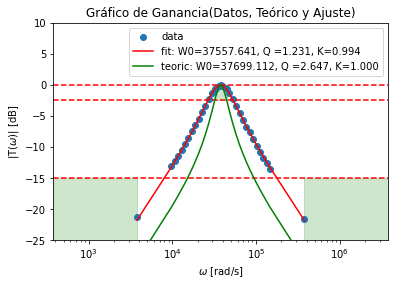

Desvío estandar de los ajustes

σ(W0)    39.911584
σ(Q)      0.004329
σ(K)      0.001539
dtype: float64


In [10]:
# Ajuste de los puntos en módulo
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max])

popt, pcov = curve_fit(circ.trans_pb_mod, w_dso, ganancia_dso,bounds=bounds)

# Gráfico Ganancia

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Gráfico Plantilla

ws=[0.6E3*2*math.pi,60E3*2*math.pi]
wc=[5.08E3*2*math.pi,7.08E3*2*math.pi]
a_c = 2.5
a_s = 15
a_b = 0
circ.dibujar_plantilla_bp(ax,wc,ws,a_c,a_s,a_b);

# Grafico los datos en db

ax.scatter(w_dso, 20*np.log10(ganancia_dso), label='data')

# Gráfico del ajuste

plt.plot(w_dso, 20*np.log10(circ.mod_trans_pb(np.zeros_like(w_dso),w_dso, popt)), 'r-',
         label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt))

# Gráfico teórico
plt.plot(w_dso, 20*np.log10(circ.mod_trans_pb(np.zeros_like(w_dso),w_dso, popt_teoric)),
         'g-', label='teoric: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_teoric))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('|T($\omega$)| [dB]')
plt.legend()
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Ganancia(Datos, Teórico y Ajuste)")

plt.show()

# Datos del desvío standard del ajuste
perr_Ganancia = np.sqrt(np.diag(pcov)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Ganancia, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Fase

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

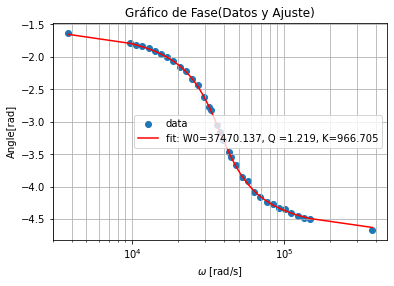

Desvío estandar de los ajustes

σ(W0)    8.176940e+01
σ(Q)     9.963687e-03
σ(K)     2.765562e+08
dtype: float64


In [11]:
# Ajuste de los puntos en fase
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max])

popt_angle, pcov_angle = curve_fit(circ.trans_pb_arg, w_dso, angulo_dso, bounds = bounds)

# Gráfico fase

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Grafico los datos en db

ax.scatter(w_dso, angulo_dso, label='data')

# Gráfico del ajuste

plt.plot(w_dso, circ.arg_trans_pb(np.zeros_like(w_dso),w_dso, popt_angle), 'r-', label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_angle))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Angle[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Fase(Datos y Ajuste)")
plt.legend()

plt.show()

# Datos del desvío standard del ajuste

perr_Fase = np.sqrt(np.diag(pcov_angle)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Fase, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Retardo de grupo

- Este gráfico se realizó con los datos del ajuste en fase.
- Se utiliza la función derivate del módulo scipy.

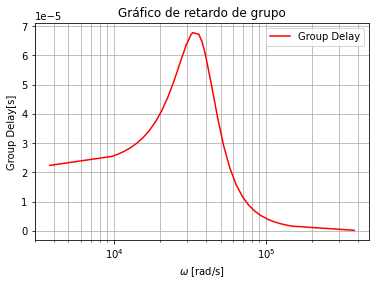

In [12]:
# Retardo de Grupo

group_delay_fit = -derivative(circ.trans_pb_arg,w_dso,args=popt_angle)

# Gráfico Retardo de grupo

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

plt.plot(w_dso, group_delay_fit, color='red', label='Group Delay')

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Group Delay[s]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de retardo de grupo")
plt.legend()

plt.show()

# Analizador de frecuencia:

### Gráfico de Módulo

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

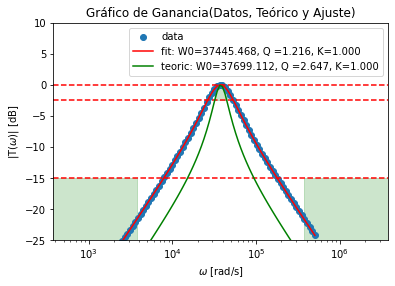

Desvío estandar de los ajustes

σ(W0)    2.385851
σ(Q)     0.000252
σ(K)     0.000107
dtype: float64


In [13]:
# Ajuste de los puntos en módulo
bounds = ([w0_min, q_min, k_min],[w0_max, q_max/5, k_max])

popt_2, pcov_2 = curve_fit(circ.trans_pb_mod
                           , w_analizador_ganancia
                           , ganancia_analizador
                           ,bounds=bounds)

# Gráfico Ganancia

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Gráfico Plantilla

ws=[0.6E3*2*math.pi,60E3*2*math.pi]
wc=[5.08E3*2*math.pi,7.08E3*2*math.pi]
a_c = 2.5
a_s = 15
a_b = 0
circ.dibujar_plantilla_bp(ax,wc,ws,a_c,a_s,a_b);

# Grafico los datos en db

ax.scatter(w_analizador_ganancia, 20*np.log10(ganancia_analizador), label='data')

# Gráfico del ajuste

aux_gain = 20*np.log10(circ.mod_trans_pb(np.zeros_like(w_analizador_ganancia),w_analizador_ganancia, popt_2))
plt.plot(w_analizador_ganancia,
         aux_gain, 
         'r-',
         label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_2))

# Gráfico teórico

popt_teoric = [W0_teoric, Q_teoric, K_teoric]

ganancia_teórica = 20*np.log10(circ.trans_pb_mod(w_analizador_ganancia,
          popt_teoric[0],popt_teoric[1],popt_teoric[2]))
plt.plot(w_analizador_ganancia, ganancia_teórica,
         'g-', label='teoric: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_teoric))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('|T($\omega$)| [dB]')
plt.legend()
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Ganancia(Datos, Teórico y Ajuste)")

plt.show()

# Datos del desvío standard del ajuste
perr_Ganancia = np.sqrt(np.diag(pcov_2)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Ganancia, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Fase

- En los siguientes gráficos se puede observar los datos obtenidos con el instrumental y además su respectivo ajuste.

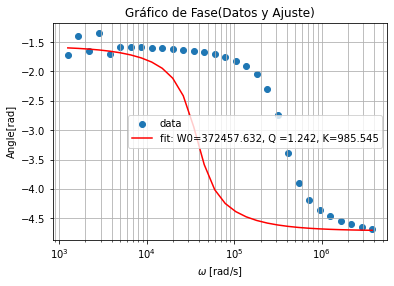

Desvío estandar de los ajustes

σ(W0)    6.972978e+03
σ(Q)     7.366251e-02
σ(K)     4.790549e+09
dtype: float64


In [14]:
# Ajuste de los puntos en fase
bounds = ([w0_min, q_min, k_min],[w0_max, q_max, k_max])

popt_3, pcov_3 = curve_fit(circ.trans_pb_arg, w_analizador_fase, angulo_analizador, bounds = bounds)

# Gráfico fase

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

# Grafico los datos en db

ax.scatter(w_analizador_fase, angulo_analizador, label='data')

# Gráfico del ajuste

plt.plot(w_analizador_fase,
         circ.arg_trans_pb(np.zeros_like(w_analizador_fase),
                           w_analizador_fase, popt_angle),
         'r-',
         label='fit: W0=%5.3f, Q =%5.3f, K=%5.3f' % tuple(popt_3))

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Angle[rad]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de Fase(Datos y Ajuste)")
plt.legend()

plt.show()

# Datos del desvío standard del ajuste

perr_Fase = np.sqrt(np.diag(pcov_3)) # Desviación Estandar

df_desvíostandard = pd.Series(perr_Fase, index=["σ(W0)", "σ(Q)", "σ(K)"])

print("Desvío estandar de los ajustes\n")
print(df_desvíostandard);

### Gráfico de Retardo de grupo

- Este gráfico se realizó con los datos del ajuste en fase.
- Se utiliza la función derivate del módulo scipy.

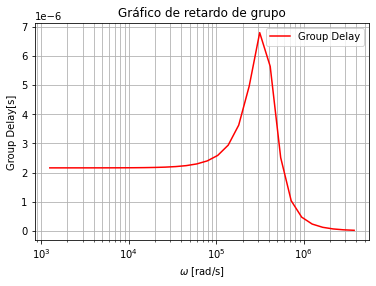

In [15]:
# Retardo de Grupo

group_delay_fit = -derivative(circ.trans_pb_arg,w_analizador_fase,args=popt_3)

# Gráfico Retardo de grupo

fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')

plt.plot(w_analizador_fase, group_delay_fit, color='red', label='Group Delay')

# Configuraciones del plot

plt.xlabel('$\omega$ [rad/s]')
plt.ylabel('Group Delay[s]')
ax.grid(which='both', axis='both')
ax.set_xscale('log')
ax.set_title("Gráfico de retardo de grupo")
plt.legend()

plt.show()

# Extra Didáctico

- Gráfico del plano S en 3D. Donde el eje Z representa la ganancia en decibelios.
- Además se puede observar una linea negra, la cual es un indicio de lo que podemos obtener en la respuesta en módulo, solo que el eje y no está logaritmado.

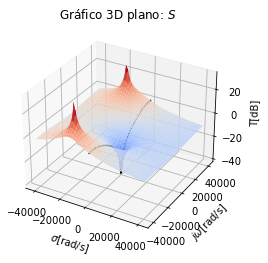

In [16]:

# Gráfico 3D polos y ceros

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-(1.1*popt[0]),(1.1*popt[0]),100)
Y = np.linspace(-(1.1*popt[0]),(1.1*popt[0]),100)
X, Y = np.meshgrid(X,Y)

ax.plot_surface(X, Y, 20*np.log10(circ.mod_trans_pb(X,Y,popt)), cmap=cm.coolwarm, linewidth=0, antialiased=True)

Y = np.linspace(-(1.1*popt[0]),(1.1*popt[0]),100)
X = np.zeros_like(Y)
ax.plot3D(X,Y,20*np.log10(circ.mod_trans_pb(X,Y,popt)), 'black')

# Configuraciones del plot

ax.set_title("Gráfico 3D plano: $S$")
ax.set_xlabel('$\sigma$[rad/s]')
ax.set_ylabel('$j\omega$[rad/s]')
ax.set_zlabel('T[dB]')
ax.yaxis._axinfo['label']['space_factor'] = 3.0
    
plt.show()